In [14]:
# Rakki maths 1st test
import random

def sample_div(n=3, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=1):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

def sample_rect(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    c = random.randint(10**(m-2), 10**(m-1))
    return 'Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist ' + str(a) + ', die Breite ist ' + str(b) + ', die Einfahrt ' + str(c) + ' Meter. Wie viel Zaun brauche ich?'

def write_number(n=4):
    a = random.randint(10**(n-1), 10**n)
    lttrs = ['T', 'H', 'Z', 'E']
    res = [c + lttrs[i + (len(lttrs)-n)] for i,c in enumerate(str(a))]
    random.shuffle(res)
    return res

def conv_nr(n=2):
    a = random.randint(10**(n-1), 10**n)
    return 'Wie viele mm sind ' + str(a) + 'm?'

for i in range(3):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(3):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")
for i in range(3): 
    print(f"{sample_rect()}")
for i in range(3):
    print(f"{write_number()}")
for i in range(3):
    print(f"{conv_nr()}")

672 : 74 = 9, R 6
794 : 67 = 11, R 57
151 : 9 = 16, R 7
981 * 8 = 7848
376 * 6 = 2256
549 * 5 = 2745
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 526, die Breite ist 488, die Einfahrt 45 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 527, die Breite ist 914, die Einfahrt 18 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 542, die Breite ist 564, die Einfahrt 21 Meter. Wie viel Zaun brauche ich?
['5T', '0E', '8H', '1Z']
['8Z', '0E', '1T', '3H']
['7E', '2T', '5Z', '5H']
Wie viele mm sind 58m?
Wie viele mm sind 23m?
Wie viele mm sind 31m?


In [2]:
# erosion model via NN

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
%matplotlib notebook

def spsty(k, x, nbrs):
    '''sparsity at x for k neighbors'''
    dist, ind = nbrs.kneighbors(x)
    return np.sum(dist) / k

modeldim = 144
nshown = 80
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 3, modeldim # 2

word = u'xxxx'  # <--- change this to display a different neighbourhood
word_labels = [word]

close_words = model.wv.most_similar(word, topn=nshown)
arr = np.empty((0, D_in), dtype='f')
arr = np.append(arr, np.array([model.wv[word]]), axis=0)
for wrd_score in close_words:
    wrd_vector = model.wv[wrd_score[0]]
    if not wrd_score[0] in word_labels: # fix double-words
        word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
    
y = range(D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.05
w2 = np.random.randn(H, D_out)*0.05

b1 = np.zeros(H)  # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

learning_rate = 1e-1
for t in range(60):
    # Forward pass: compute predicted y
    h = np.dot(arr, w1) + b1
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    y_pred = np.dot(h_relu, w2) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    grad_w2 = np.dot(h_relu.T, grad_y_pred) * np.ones_like(w2)  # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T)  # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0  # ReLU'
    grad_w1 = np.dot(grad_h.T, arr)
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1.T, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8)  # adagrad update
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
xc = []
yc = []
xysz = []
for i in range(nshown):
    xycoord = np.dot(arr[i], w1)
    scalezcoord = np.average(xycoord) / 50
    xc.append(xycoord[0] + random.uniform(-xycoord[2], xycoord[2]) / scalezcoord)  # use 3rd hidden variable to change pos a bit
    yc.append(xycoord[1] + random.uniform(-xycoord[2], xycoord[2]) / scalezcoord)
    xysz.append(model.wv.get_vecattr(close_words[i][0], "count") / 10)
    
for label, x, y in zip(word_labels, xc, yc):
    if label == word:  # make the reference term stand out
        plt.annotate(label, xy=(x, y), xytext=(1, 1), textcoords='offset points', fontsize=12, color='red')
    else:
        plt.annotate(label, xy=(x, y), xytext=(1, 1), textcoords='offset points', fontsize=10)

plt.scatter(xc, yc, s=xysz)
ax = plt.gca()
ax.set_facecolor('white')

plt.show()
#plt.savefig('w2vec cloud 0.png', bbox_inches='tight')

NameError: name 'model' is not defined

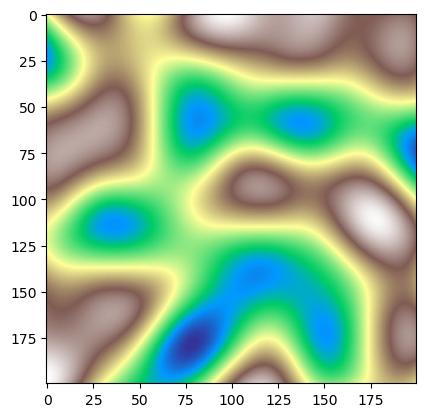

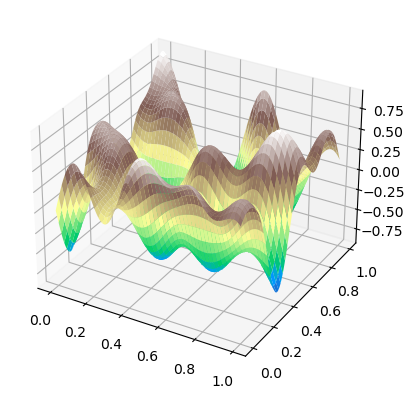

In [3]:
%matplotlib inline
#import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

"""Perlin noise -- pure python implementation"""

__version__ = '$Id: perlin.py 521 2008-12-15 03:03:52Z casey.duncan $'

from math import floor, fmod, sqrt
from random import randint

# 3D Gradient vectors
_GRAD3 = ((1,1,0),(-1,1,0),(1,-1,0),(-1,-1,0), 
	(1,0,1),(-1,0,1),(1,0,-1),(-1,0,-1), 
	(0,1,1),(0,-1,1),(0,1,-1),(0,-1,-1),
	(1,1,0),(0,-1,1),(-1,1,0),(0,-1,-1),
) 

# 4D Gradient vectors
_GRAD4 = ((0,1,1,1), (0,1,1,-1), (0,1,-1,1), (0,1,-1,-1), 
	(0,-1,1,1), (0,-1,1,-1), (0,-1,-1,1), (0,-1,-1,-1), 
	(1,0,1,1), (1,0,1,-1), (1,0,-1,1), (1,0,-1,-1), 
	(-1,0,1,1), (-1,0,1,-1), (-1,0,-1,1), (-1,0,-1,-1), 
	(1,1,0,1), (1,1,0,-1), (1,-1,0,1), (1,-1,0,-1), 
	(-1,1,0,1), (-1,1,0,-1), (-1,-1,0,1), (-1,-1,0,-1), 
	(1,1,1,0), (1,1,-1,0), (1,-1,1,0), (1,-1,-1,0), 
	(-1,1,1,0), (-1,1,-1,0), (-1,-1,1,0), (-1,-1,-1,0))

# A lookup table to traverse the simplex around a given point in 4D. 
# Details can be found where this table is used, in the 4D noise method. 
_SIMPLEX = (
	(0,1,2,3),(0,1,3,2),(0,0,0,0),(0,2,3,1),(0,0,0,0),(0,0,0,0),(0,0,0,0),(1,2,3,0), 
	(0,2,1,3),(0,0,0,0),(0,3,1,2),(0,3,2,1),(0,0,0,0),(0,0,0,0),(0,0,0,0),(1,3,2,0), 
	(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0), 
	(1,2,0,3),(0,0,0,0),(1,3,0,2),(0,0,0,0),(0,0,0,0),(0,0,0,0),(2,3,0,1),(2,3,1,0), 
	(1,0,2,3),(1,0,3,2),(0,0,0,0),(0,0,0,0),(0,0,0,0),(2,0,3,1),(0,0,0,0),(2,1,3,0), 
	(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0), 
	(2,0,1,3),(0,0,0,0),(0,0,0,0),(0,0,0,0),(3,0,1,2),(3,0,2,1),(0,0,0,0),(3,1,2,0), 
	(2,1,0,3),(0,0,0,0),(0,0,0,0),(0,0,0,0),(3,1,0,2),(0,0,0,0),(3,2,0,1),(3,2,1,0))

# Simplex skew constants
_F2 = 0.5 * (sqrt(3.0) - 1.0)
_G2 = (3.0 - sqrt(3.0)) / 6.0
_F3 = 1.0 / 3.0
_G3 = 1.0 / 6.0


class BaseNoise:
	"""Noise abstract base class"""

	permutation = (151,160,137,91,90,15, 
		131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23, 
		190,6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33, 
		88,237,149,56,87,174,20,125,136,171,168,68,175,74,165,71,134,139,48,27,166, 
		77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244, 
		102,143,54,65,25,63,161,1,216,80,73,209,76,132,187,208,89,18,169,200,196, 
		135,130,116,188,159,86,164,100,109,198,173,186,3,64,52,217,226,250,124,123, 
		5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42, 
		223,183,170,213,119,248,152,2,44,154,163,70,221,153,101,155,167,43,172,9, 
		129,22,39,253,9,98,108,110,79,113,224,232,178,185,112,104,218,246,97,228, 
		251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107, 
		49,192,214,31,181,199,106,157,184,84,204,176,115,121,50,45,127,4,150,254, 
		138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180)
	
	period = len(permutation)

	# Double permutation array so we don't need to wrap
	permutation = permutation * 2

	def __init__(self, period=None, permutation_table=None):
		"""Initialize the noise generator. With no arguments, the default
		period and permutation table are used (256). The default permutation
		table generates the exact same noise pattern each time.
		
		An integer period can be specified, to generate a random permutation
		table with period elements. The period determines the (integer)
		interval that the noise repeats, which is useful for creating tiled
		textures.  period should be a power-of-two, though this is not
		enforced. Note that the speed of the noise algorithm is indpendent of
		the period size, though larger periods mean a larger table, which
		consume more memory.

		A permutation table consisting of an iterable sequence of whole
		numbers can be specified directly. This should have a power-of-two
		length. Typical permutation tables are a sequnce of unique integers in
		the range [0,period) in random order, though other arrangements could
		prove useful, they will not be "pure" simplex noise. The largest
		element in the sequence must be no larger than period-1.

		period and permutation_table may not be specified together.
		"""
		if period is not None and permutation_table is not None:
			raise ValueError(
				'Can specify either period or permutation_table, not both')
		if period is not None:
			self.randomize(period)
		elif permutation_table is not None:
			self.permutation = tuple(permutation_table) * 2
			self.period = len(permutation_table)

	def randomize(self, period=None):
		"""Randomize the permutation table used by the noise functions. This
		makes them generate a different noise pattern for the same inputs.
		"""
		if period is not None:
			self.period = period
		perm = list(range(self.period))
		perm_right = self.period - 1
		for i in list(perm):
			j = randint(0, perm_right)
			perm[i], perm[j] = perm[j], perm[i]
		self.permutation = tuple(perm) * 2


class SimplexNoise(BaseNoise):
	"""Perlin simplex noise generator

	Adapted from Stefan Gustavson's Java implementation described here:

	http://staffwww.itn.liu.se/~stegu/simplexnoise/simplexnoise.pdf

	To summarize:

	"In 2001, Ken Perlin presented 'simplex noise', a replacement for his classic
	noise algorithm.  Classic 'Perlin noise' won him an academy award and has
	become an ubiquitous procedural primitive for computer graphics over the
	years, but in hindsight it has quite a few limitations.  Ken Perlin himself
	designed simplex noise specifically to overcome those limitations, and he
	spent a lot of good thinking on it. Therefore, it is a better idea than his
	original algorithm. A few of the more prominent advantages are: 

	* Simplex noise has a lower computational complexity and requires fewer
	  multiplications. 
	* Simplex noise scales to higher dimensions (4D, 5D and up) with much less
	  computational cost, the complexity is O(N) for N dimensions instead of 
	  the O(2^N) of classic Noise. 
	* Simplex noise has no noticeable directional artifacts.  Simplex noise has 
	  a well-defined and continuous gradient everywhere that can be computed 
	  quite cheaply. 
	* Simplex noise is easy to implement in hardware."
	"""

	def noise2(self, x, y):
		"""2D Perlin simplex noise. 
		
		Return a floating point value from -1 to 1 for the given x, y coordinate. 
		The same value is always returned for a given x, y pair unless the
		permutation table changes (see randomize above). 
		"""
		# Skew input space to determine which simplex (triangle) we are in
		s = (x + y) * _F2
		i = floor(x + s)
		j = floor(y + s)
		t = (i + j) * _G2
		x0 = x - (i - t) # "Unskewed" distances from cell origin
		y0 = y - (j - t)

		if x0 > y0:
			i1 = 1; j1 = 0 # Lower triangle, XY order: (0,0)->(1,0)->(1,1)
		else:
			i1 = 0; j1 = 1 # Upper triangle, YX order: (0,0)->(0,1)->(1,1)
		
		x1 = x0 - i1 + _G2 # Offsets for middle corner in (x,y) unskewed coords
		y1 = y0 - j1 + _G2
		x2 = x0 + _G2 * 2.0 - 1.0 # Offsets for last corner in (x,y) unskewed coords
		y2 = y0 + _G2 * 2.0 - 1.0

		# Determine hashed gradient indices of the three simplex corners
		perm = self.permutation
		ii = int(i) % self.period
		jj = int(j) % self.period
		gi0 = perm[ii + perm[jj]] % 12
		gi1 = perm[ii + i1 + perm[jj + j1]] % 12
		gi2 = perm[ii + 1 + perm[jj + 1]] % 12

		# Calculate the contribution from the three corners
		tt = 0.5 - x0**2 - y0**2
		if tt > 0:
			g = _GRAD3[gi0]
			noise = tt**4 * (g[0] * x0 + g[1] * y0)
		else:
			noise = 0.0
		
		tt = 0.5 - x1**2 - y1**2
		if tt > 0:
			g = _GRAD3[gi1]
			noise += tt**4 * (g[0] * x1 + g[1] * y1)
		
		tt = 0.5 - x2**2 - y2**2
		if tt > 0:
			g = _GRAD3[gi2]
			noise += tt**4 * (g[0] * x2 + g[1] * y2)

		return noise * 70.0 # scale noise to [-1, 1]

	def noise3(self, x, y, z):
		"""3D Perlin simplex noise. 
		
		Return a floating point value from -1 to 1 for the given x, y, z coordinate. 
		The same value is always returned for a given x, y, z pair unless the
		permutation table changes (see randomize above).
		"""
		# Skew the input space to determine which simplex cell we're in
		s = (x + y + z) * _F3
		i = floor(x + s)
		j = floor(y + s)
		k = floor(z + s)
		t = (i + j + k) * _G3
		x0 = x - (i - t) # "Unskewed" distances from cell origin
		y0 = y - (j - t)
		z0 = z - (k - t)

		# For the 3D case, the simplex shape is a slightly irregular tetrahedron. 
		# Determine which simplex we are in. 
		if x0 >= y0:
			if y0 >= z0:
				i1 = 1; j1 = 0; k1 = 0
				i2 = 1; j2 = 1; k2 = 0
			elif x0 >= z0:
				i1 = 1; j1 = 0; k1 = 0
				i2 = 1; j2 = 0; k2 = 1
			else:
				i1 = 0; j1 = 0; k1 = 1
				i2 = 1; j2 = 0; k2 = 1
		else: # x0 < y0
			if y0 < z0:
				i1 = 0; j1 = 0; k1 = 1
				i2 = 0; j2 = 1; k2 = 1
			elif x0 < z0:
				i1 = 0; j1 = 1; k1 = 0
				i2 = 0; j2 = 1; k2 = 1
			else:
				i1 = 0; j1 = 1; k1 = 0
				i2 = 1; j2 = 1; k2 = 0
		
		# Offsets for remaining corners
		x1 = x0 - i1 + _G3
		y1 = y0 - j1 + _G3
		z1 = z0 - k1 + _G3
		x2 = x0 - i2 + 2.0 * _G3
		y2 = y0 - j2 + 2.0 * _G3
		z2 = z0 - k2 + 2.0 * _G3
		x3 = x0 - 1.0 + 3.0 * _G3
		y3 = y0 - 1.0 + 3.0 * _G3
		z3 = z0 - 1.0 + 3.0 * _G3

		# Calculate the hashed gradient indices of the four simplex corners
		perm = self.permutation
		ii = int(i) % self.period
		jj = int(j) % self.period
		kk = int(k) % self.period
		gi0 = perm[ii + perm[jj + perm[kk]]] % 12
		gi1 = perm[ii + i1 + perm[jj + j1 + perm[kk + k1]]] % 12
		gi2 = perm[ii + i2 + perm[jj + j2 + perm[kk + k2]]] % 12
		gi3 = perm[ii + 1 + perm[jj + 1 + perm[kk + 1]]] % 12

		# Calculate the contribution from the four corners
		noise = 0.0
		tt = 0.6 - x0**2 - y0**2 - z0**2
		if tt > 0:
			g = _GRAD3[gi0]
			noise = tt**4 * (g[0] * x0 + g[1] * y0 + g[2] * z0)
		else:
			noise = 0.0
		
		tt = 0.6 - x1**2 - y1**2 - z1**2
		if tt > 0:
			g = _GRAD3[gi1]
			noise += tt**4 * (g[0] * x1 + g[1] * y1 + g[2] * z1)
		
		tt = 0.6 - x2**2 - y2**2 - z2**2
		if tt > 0:
			g = _GRAD3[gi2]
			noise += tt**4 * (g[0] * x2 + g[1] * y2 + g[2] * z2)
		
		tt = 0.6 - x3**2 - y3**2 - z3**2
		if tt > 0:
			g = _GRAD3[gi3]
			noise += tt**4 * (g[0] * x3 + g[1] * y3 + g[2] * z3)
		
		return noise * 32.0


def lerp(t, a, b):
	return a + t * (b - a)

def grad3(hash, x, y, z):
	g = _GRAD3[hash % 16]
	return x*g[0] + y*g[1] + z*g[2]


class TileableNoise(BaseNoise):
	"""Tileable implemention of Perlin "improved" noise. This
	is based on the reference implementation published here:
	
	http://mrl.nyu.edu/~perlin/noise/
	"""

	def noise3(self, x, y, z, repeat, base=0.0):
		"""Tileable 3D noise.
		
		repeat specifies the integer interval in each dimension 
		when the noise pattern repeats.
		
		base allows a different texture to be generated for
		the same repeat interval.
		"""
		i = int(fmod(floor(x), repeat))
		j = int(fmod(floor(y), repeat))
		k = int(fmod(floor(z), repeat))
		ii = (i + 1) % repeat
		jj = (j + 1) % repeat
		kk = (k + 1) % repeat
		if base:
			i += base; j += base; k += base
			ii += base; jj += base; kk += base

		x -= floor(x); y -= floor(y); z -= floor(z)
		fx = x**3 * (x * (x * 6 - 15) + 10)
		fy = y**3 * (y * (y * 6 - 15) + 10)
		fz = z**3 * (z * (z * 6 - 15) + 10)

		perm = self.permutation
		A = perm[i]
		AA = perm[A + j]
		AB = perm[A + jj]
		B = perm[ii]
		BA = perm[B + j]
		BB = perm[B + jj]
		
		return lerp(fz, lerp(fy, lerp(fx, grad3(perm[AA + k], x, y, z),
										  grad3(perm[BA + k], x - 1, y, z)),
								 lerp(fx, grad3(perm[AB + k], x, y - 1, z),
										  grad3(perm[BB + k], x - 1, y - 1, z))),
						lerp(fy, lerp(fx, grad3(perm[AA + kk], x, y, z - 1),
										  grad3(perm[BA + kk], x - 1, y, z - 1)),
								 lerp(fx, grad3(perm[AB + kk], x, y - 1, z - 1),
										  grad3(perm[BB + kk], x - 1, y - 1, z - 1))))

shape = (200, 200)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

world = np.zeros(shape)
bn = SimplexNoise()
bn.randomize()

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = bn.noise2(i/scale, 
                                    j/scale, 
                                    #octaves=octaves, 
                                    #persistence=persistence, 
                                    #lacunarity=lacunarity, 
                                    #repeatx=1024, 
                                    #repeaty=1024, 
                                    #base=42)
                               )
        
matplotlib.pyplot.imshow(world, cmap='terrain')

lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

In [17]:
# https://www.janestreet.com/numberphile/
import math

def alljumps(n):
    return [(k, k-math.ceil(k/2), k+math.ceil(k/2)) for k in range(1, n+1)]

def njumps(n, s=1, path=[]):
    if s == n:
        return path
    if s < 3*n/2:
        return njumps(n, s + math.ceil(s/2), path + [math.ceil(s/2)])  # go right
    else:
        return njumps(n, s - math.ceil(s/2), path + [-math.ceil(s/2)])  # go left

#[len(njumps(n)) for n in range(1,17)]  # [0, 1, 2, 5, 3, 6, 9, 4, 7, 10, 13, 5, 8, 19, 11, 14]
print([njumps(n) for n in range(1,13)])
#alljumps(17)

def njumps2(n, s=1, path=[]):
    if s == n:
        return path
    if n > n*s:
        return njumps2(n, s + path[-1], path[:-1])  # backtrack
    if n > s/2:
        return njumps2(n, s + math.ceil(s/2), path + [math.ceil(s/2)])  # go right
    else:
        return njumps2(n, s - math.ceil(s/2), path + [-math.ceil(s/2)])  # go left

def njumps1(n, s=1, path=[(1,1)]):
    if s == n:
        return path
    if n > n*s:  # right branch may grow ad infinitum
        path[-1] = (path[-1][0], 0)
        return njumps1(n, s + path[-1][0], path)  # backtrack
    if n > s/2 and not (path[-1][0]>0 and path[-1][1]==0):
        return njumps1(n, s + math.ceil(s/2), path + [(math.ceil(s/2), 1)])  # go right
    elif  not (path[-1][0]<0 and path[-1][1]==0):
        return njumps1(n, s - math.ceil(s/2), path + [(-math.ceil(s/2), 1)])  # go left
    path[-1] = (path[-1][0], 0)
    return njumps1(n, s + path[-1][0], path)  # backtrack

def njumps4(n, s, ctr=0, path=[]):
    if s <= 1:
        return (n, s, ctr, path)
    return njumps4(n, s - math.ceil(s/3), ctr+1, path + [s])

#print([njumps4(n, n) for n in range(1,20)])
#for n in range(1, 12):
    #print(njumps(n, 1))
#[njumps1(n) for n in range(1,17)]

[[], [1], [1, 1], [1, 1, 2, 3, -4], [1, 1, 2], [1, 1, 2, 3, 4, -6], [1, 1, 2, 3, 4, -6, 3, 5, -7], [1, 1, 2, 3], [1, 1, 2, 3, 4, 6, -9], [1, 1, 2, 3, 4, 6, -9, 5, 7, -11], [1, 1, 2, 3, 4, 6, -9, 5, 7, -11, 5, 8, -12], [1, 1, 2, 3, 4]]


In [3]:
# Using a Python dictionary to act as an adjacency list
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, '5')      

Following is the Depth-First Search
5
3
2
4
8
7


In [1]:
import math

def treefor(n):
    res = [n]
    resf = []
    while res[0] > 1:
        thisline = []
        for el in res:
            d = int((el+1-(el-1)%2)/2)
            thisline.append(el-d)
            thisline.append(el+d)
        res = [el for el in thisline]
        resf.append(res)
    return resf

def parentsfor(n):
    return (math.floor(2*n/3), math.floor(n/2))

def invtreefor(n):
    res = [n]
    resf = []
    ctr = 1
    while res[-1] > 1:
        thisline = []
        for el in res:
            p = parentsfor(el)
            thisline.append(p[0])
            thisline.append(p[1])
            ctr += 1
        res = [el for el in thisline]
        resf.append(res)
    return resf, ctr

#print([(n, int((n+1-(n-1)%2)/2)) for n in range(1,10)])
#print([(n-int((n+1-(n-1)%2)/2), n+int((n+1-(n-1)%2)/2)) for n in range(1,20)])
for l in range(1,20):
    print(l, treefor(l))
    
print('****************************************************')

#print([(n, invtreefor(n)[1]) for n in range(1,40)])

1 []
2 [[1, 3]]
3 [[1, 5]]
4 [[2, 6], [1, 3, 3, 9]]
5 [[2, 8], [1, 3, 4, 12]]
6 [[3, 9], [1, 5, 4, 14]]
7 [[3, 11], [1, 5, 5, 17]]
8 [[4, 12], [2, 6, 6, 18], [1, 3, 3, 9, 3, 9, 9, 27]]
9 [[4, 14], [2, 6, 7, 21], [1, 3, 3, 9, 3, 11, 10, 32]]
10 [[5, 15], [2, 8, 7, 23], [1, 3, 4, 12, 3, 11, 11, 35]]
11 [[5, 17], [2, 8, 8, 26], [1, 3, 4, 12, 4, 12, 13, 39]]
12 [[6, 18], [3, 9, 9, 27], [1, 5, 4, 14, 4, 14, 13, 41]]
13 [[6, 20], [3, 9, 10, 30], [1, 5, 4, 14, 5, 15, 15, 45]]
14 [[7, 21], [3, 11, 10, 32], [1, 5, 5, 17, 5, 15, 16, 48]]
15 [[7, 23], [3, 11, 11, 35], [1, 5, 5, 17, 5, 17, 17, 53]]
16 [[8, 24], [4, 12, 12, 36], [2, 6, 6, 18, 6, 18, 18, 54], [1, 3, 3, 9, 3, 9, 9, 27, 3, 9, 9, 27, 9, 27, 27, 81]]
17 [[8, 26], [4, 12, 13, 39], [2, 6, 6, 18, 6, 20, 19, 59], [1, 3, 3, 9, 3, 9, 9, 27, 3, 9, 10, 30, 9, 29, 29, 89]]
18 [[9, 27], [4, 14, 13, 41], [2, 6, 7, 21, 6, 20, 20, 62], [1, 3, 3, 9, 3, 11, 10, 32, 3, 9, 10, 30, 10, 30, 31, 93]]
19 [[9, 29], [4, 14, 14, 44], [2, 6, 7, 21, 7, 21, 22, 6

In [68]:
import math

visited = set() # Set to keep track of visited nodes of graph

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
            
def dfsg(visited, graph, s, n, ctr):
    if s > 10*n:
        return
    if s not in visited:
        visited.add(s)
        d = int((s+1-(s-1)%2)/2)
        graph[s] = (s-d, s+d)
        #print(n, s, graph[s])
        if n == s-d or n == s+d:
            print(f'for n {n} found: {ctr+1}')
            return
        for neighbour in graph[s]:
            dfsg(visited, graph, neighbour, n, ctr+1)
            
def f1(x, n=100):
    s = 1
    tot = 0
    for i in range(n):
        s += math.ceil(s/2)
        tot += s*x**i
    return tot

def f2(x):
    return x*x / ((1-x*x)*(2-3*x))

# Driver Code
#print(dfsg(visited, {}, 1, 12, 0))
for n in range(1,50):
    visited = set()
    dfsg(visited, {}, 1, n, 0)
#print(f" detailed {f1(0.5):2.4f}, approx {f2(0.5):2.4f}")

for n 1 found: 2
for n 2 found: 1
for n 3 found: 2
for n 4 found: 5
for n 5 found: 3
for n 6 found: 6
for n 6 found: 6
for n 7 found: 9
for n 7 found: 12
for n 8 found: 4
for n 9 found: 7
for n 9 found: 7
for n 10 found: 15
for n 10 found: 45
for n 11 found: 10
for n 11 found: 13
for n 11 found: 21
for n 12 found: 5
for n 13 found: 13
for n 13 found: 27
for n 14 found: 8
for n 14 found: 19
for n 14 found: 38
for n 15 found: 16
for n 15 found: 16
for n 15 found: 27
for n 16 found: 27
for n 16 found: 54
for n 17 found: 11
for n 17 found: 14
for n 17 found: 68
for n 18 found: 30
for n 18 found: 30
for n 18 found: 38
for n 19 found: 41
for n 19 found: 87
for n 20 found: 14
for n 20 found: 25
for n 20 found: 25
for n 21 found: 9
for n 21 found: 39
for n 21 found: 39
for n 22 found: 25
for n 22 found: 44
for n 23 found: 17
for n 23 found: 28
for n 23 found: 28
for n 24 found: 28
for n 24 found: 47
for n 24 found: 55
for n 25 found: 47
for n 25 found: 82
for n 26 found: 12
for n 26 found: 15


In [27]:
import math

def f1(x, n=500):
    s = 1
    tot = 0
    for i in range(1, n):
        s += math.ceil(s/2)
        tot += s*x**i
    return tot

def f2(x):
    return (x**3-x*x+1)/((1-x)**3*(1+x))

print(f1(0.75), f2(0.75))

4.891865213504946e+26 31.428571428571427


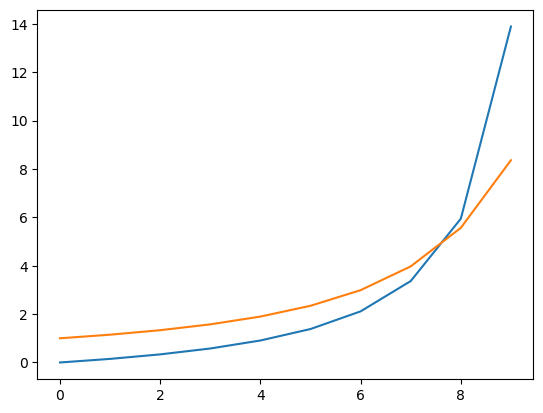

In [25]:
import math
import matplotlib.pyplot as plt

def f1(x, n=500):
    s = 1
    tot = 0
    for i in range(1, n):
        s += math.ceil(s/2)
        tot += s*x**i
    return tot

def f2(x):
    return (x**3-x*x+1)/((1-x)**3*(1+x))

#print(f1(0.9), f2(0.9))
plt.plot([f1(x/15) for x in range(10)])
plt.plot([f2(x/15) for x in range(10)])
plt.show()

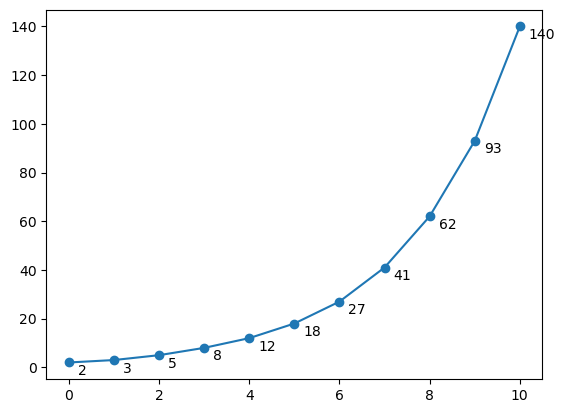

In [55]:
import math
import matplotlib.pyplot as plt
import numpy as np

def series_branch(s=1, n=100):
    res = []
    curr_s = s
    while curr_s < n:
        curr_s += math.ceil(curr_s/2)
        res.append(curr_s)
    return res

#x = np.linspace(-np.pi/2, np.pi/2, 31)
#y = np.cos(x)**3

# 1) remove points where y > 0.7
#x2 = x[y <= 0.7]
#y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
#y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
#y4 = y.copy()
#y4[y3 > 0.7] = np.nan

#plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
#plt.plot(x2*0.4, y2, 'o-', label='Points removed')
#plt.plot(x*0.7, y3, 'o-', label='Masked values')
#plt.plot(x*1.0, y4, 'o-', label='NaN values')
#plt.legend()
#plt.title('Masked and NaN data')

fig = plt.figure()
ax = fig.add_subplot(111)
y = np.array(series_branch(1, 100))
x = np.array(range(len(x)))
plt.plot(x, y, 'o-')
for i, j in zip(x, y):
    ax.annotate(str(j), xy=(i+0.2, j-5))
plt.show()

[[2, 3, 5, 8, 12, 18, 27, 41, 62, 93, 140], [6, 9, 14, 21, 32, 48, 72, 108, 162], [9, 14, 21, 32, 48, 72, 108, 162], [14, 21, 32, 48, 72, 108, 162], [20, 30, 45, 68, 102, 153], [30, 45, 68, 102, 153], [47, 71, 107, 161], [69, 104, 156], [105, 158]]


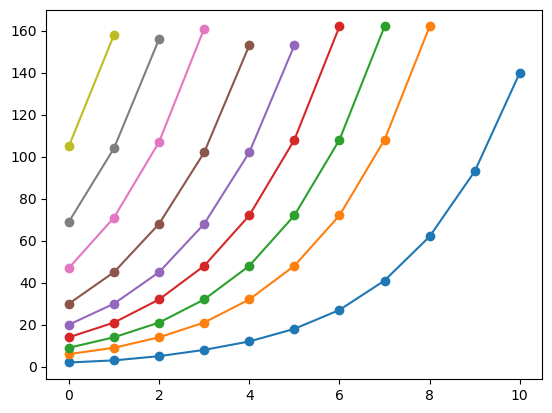

In [60]:
import math
import matplotlib.pyplot as plt
import numpy as np

def series_branch(s=1, n=100):
    res = []
    curr_s = s
    while curr_s < n:
        curr_s += math.ceil(curr_s/2)
        res.append(curr_s)
    return res

nums_covered = set()
xnl = []
nmax = 120
xnl.append(series_branch(1, nmax))
for el in xnl[0]:
    nums_covered.add(el)
    s_nxt = el - int(math.ceil(el/2))
    if not s_nxt in nums_covered and el > 5:
        xnl.append(series_branch(s_nxt, nmax))
        
print(xnl)

fig = plt.figure()
ax = fig.add_subplot(111)
for el in xnl:
    y = np.array(el)
    x = np.array(range(len(y)))
    plt.plot(x, y, 'o-')
#for i, j in zip(x, y):
#    ax.annotate(str(j), xy=(i+0.2, j-5))
plt.show()

In [31]:
import math

visited = set() # Set to keep track of visited nodes of graph
njumps = dict()

def dfsg(visited, graph, s, n, ctr):
    if s > 10*n:
        return
    if s not in visited:
        visited.add(s)
        d = int((s+1-(s-1)%2)/2)
        graph[s] = (s-d, s+d)
        if n == s-d or n == s+d:
            #print(f'for n {n} found: {ctr+1}')
            if n in njumps:
                njumps[n] = min(njumps[n], ctr+1)
            else:
                njumps[n] = ctr+1
            return
        for neighbour in graph[s]:
            dfsg(visited, graph, neighbour, n, ctr+1)

# Driver Code
for n in range(1, 200):
    visited = set()
    dfsg(visited, {}, 1, n, 0)
njumps[1] = 0
print(njumps)

{1: 0, 2: 1, 3: 2, 4: 5, 5: 3, 6: 6, 7: 9, 8: 4, 9: 7, 10: 15, 11: 10, 12: 5, 13: 13, 14: 8, 15: 16, 16: 27, 17: 11, 18: 30, 19: 41, 20: 14, 21: 9, 22: 25, 23: 17, 24: 28, 25: 47, 26: 12, 27: 31, 28: 58, 29: 50, 30: 15, 31: 34, 32: 61, 33: 26, 34: 45, 35: 18, 36: 29, 37: 56, 38: 48, 39: 13, 40: 21, 41: 32, 42: 59, 43: 86, 44: 51, 45: 24, 46: 70, 47: 35, 48: 62, 49: 54, 50: 27, 51: 46, 52: 73, 53: 19, 54: 65, 55: 111, 56: 57, 57: 49, 58: 187, 59: 76, 60: 22, 61: 68, 62: 33, 63: 60, 64: 87, 65: 106, 66: 52, 67: 79, 68: 25, 69: 71, 70: 117, 71: 36, 72: 63, 73: 109, 74: 55, 75: 82, 76: 101, 77: 47, 78: 74, 79: 120, 80: 20, 81: 66, 82: 158, 83: 112, 84: 58, 85: 85, 86: 104, 87: 234, 88: 169, 89: 77, 90: 23, 91: 42, 92: 69, 93: 34, 94: 115, 95: 199, 96: 88, 97: 153, 98: 107, 99: 53, 100: 191, 101: 80, 102: 45, 103: 229, 104: 72, 105: 118, 106: 183, 107: 37, 108: 64, 109: 156, 110: 110, 111: 56, 112: 194, 113: 83, 114: 102, 115: 297, 116: 232, 117: 75, 118: 167, 119: 121, 120: 21, 121: 40, 12

<IPython.core.display.Javascript object>


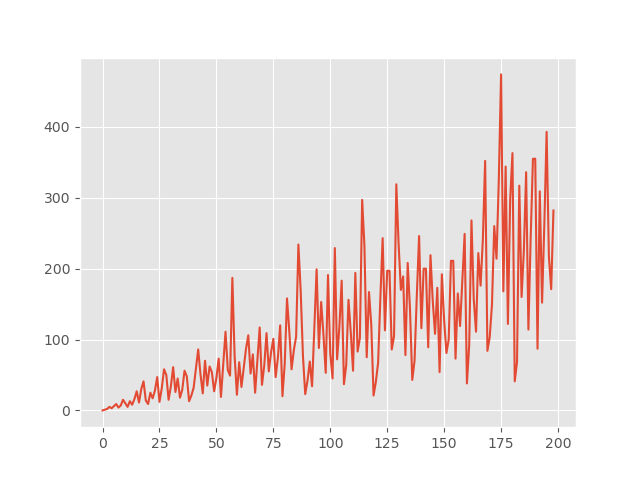

[]

In [36]:
import matplotlib.pyplot as plt

plt.plot([val for key, val in njumps.items()])
plt.plot()

In [32]:
# stone jump algo search
import numpy as np
import random

# D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
D_in, H, D_out = 1, 5, 1  # 2

arr = np.empty((0, D_in), dtype='f')   
y = np.empty((0, D_out), dtype='f')

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.05
w2 = np.random.randn(H, D_out)*0.05

b1 = np.zeros(H)  # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

learning_rate = 1e-1
n_runs = 10

for key, value in njumps.items():
    for t in range(n_runs):
        arr = key
        y = value
        # Forward pass: compute predicted y
        h = np.dot(arr, w1) + b1
        h_relu = np.maximum(h, 0)
        #h_relu = softmax(h)
        y_pred = np.dot(h_relu, w2) + b2 # output

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
        if t == (n_runs-1):
            print(key, t, loss, y, y_pred)

        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = (y_pred - y)
        grad_w2 = np.dot(h_relu.T, grad_y_pred) * np.ones_like(w2)  # dw2 = (.) ReLu(h)
        grad_b2 = grad_y_pred
        grad_h_relu = np.dot(grad_y_pred, w2.T)  # dw1 = (.) w2 ReLu'(h) x
        grad_h = grad_h_relu.copy()
        grad_h[h < 0] = 0  # ReLU'
        grad_w1 = np.dot(grad_h.T, arr)
        grad_b1 = np.dot(w2, grad_y_pred.T)

        # Update weights
        for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1.T, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
            mem += dparam * dparam
            param += -learning_rate * dparam / np.sqrt(mem + 1e-8)  # adagrad update

print(w1, w2)

1 9 1.3301176789717247e-21 0 [[3.64707784e-11]]
2 9 1.0273480423570426e-05 1 [[1.00320523]]
3 9 6.264793285313234e-16 2 [[1.99999997]]
4 9 5.502550185811292e-06 5 [[4.99765425]]
5 9 0.018962764289814842 3 [[3.13770535]]
6 9 0.0021111152470297285 6 [[5.95405313]]
7 9 2.691029579736624e-06 9 [[8.99835956]]
8 9 0.5436504804076179 4 [[4.73732658]]
9 9 0.05979374698838997 7 [[6.7554724]]
10 9 0.1749328242974629 15 [[14.58175028]]
11 9 0.30568128878606116 10 [[10.55288452]]
12 9 2.39752542409371 5 [[6.54839447]]
13 9 1.8976175504938073 13 [[11.6224596]]
14 9 0.9107283475815605 8 [[8.95432088]]
15 9 1.0721324523725102 16 [[14.96456171]]
16 9 0.5226673465121475 27 [[26.27704264]]
17 9 16.27611991538867 11 [[15.03436735]]
18 9 17.132829567290337 30 [[25.86081777]]
19 9 4.302858840286875 41 [[38.92566665]]
20 9 87.15683057895592 14 [[23.33578227]]
21 9 61.863871412989546 9 [[16.86535895]]
22 9 18.665299166894883 25 [[20.67966446]]
23 9 6.245103138581244 17 [[19.49902044]]
24 9 14.091482865584771

In [33]:
# stone jump algo search - polynomials
import numpy as np
import random

def y_poly(x, yp, ly, mult_f=1):
    len_den = 2
    zl = [0 for i in range(len_den)]
    res = np.dot(yp, np.array([mult_f*x**i for i in range(int(ly-len_den))] + zl))
    zl = [0 for i in range(ly-len_den)]
    res /= np.dot(yp, np.array(zl + [mult_f*x**i for i in range(len_den)]))
    #res = np.dot(yp, np.array([mult_f*x**i for i in range(ly)]))
    return res

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
D_in, H, D_out = 1, 12, 6  # D_out are the polynomial coefficients, half numerator, half denominator

arr = np.empty((0, D_in), dtype='f')   
y = np.empty((0, D_out), dtype='f')

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.5
w2 = np.random.randn(H, D_out)*0.5

b1 = np.zeros(H)  # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

learning_rate = 0.01
n_runs = 20

for key, value in njumps.items():
    for t in range(n_runs):
        arr = key
        y = value
        # Forward pass: compute predicted y
        h = np.dot(arr, w1) + b1
        h_relu = np.maximum(h, 0)
        #h_relu = softmax(h)
        y_pred_coeff = np.dot(h_relu, w2) + b2 # output
        y_pred = y_poly(arr, y_pred_coeff, D_out, 2.)

        # Compute and print loss
        loss = np.square(y_pred - y).sum()
        if t == (n_runs-1):
            print(key, t, loss, y, y_pred)

        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = (y_pred_coeff - y)
        grad_w2 = np.dot(h_relu.T, grad_y_pred) * np.ones_like(w2)  # dw2 = (.) ReLu(h)
        grad_b2 = grad_y_pred
        grad_h_relu = np.dot(grad_y_pred, w2.T)  # dw1 = (.) w2 ReLu'(h) x
        grad_h = grad_h_relu.copy()
        grad_h[h < 0] = 0  # ReLU'
        grad_w1 = np.dot(grad_h.T, arr)
        grad_b1 = np.dot(w2, grad_y_pred.T)

        # Update weights
        for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1.T, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
            mem += dparam * dparam
            #param += -learning_rate * dparam / np.sqrt(mem + 1e-8)  # adagrad update
            param += -learning_rate * dparam / 50

print(w1, w2)

1 19 25.405783788208883 0 [-5.04041504]
2 19 3.449159242565396 1 [2.85719122]
3 19 3.0534998894236636 2 [3.74742665]
4 19 53.14130535212841 5 [12.28980832]
5 19 262.03983277462737 3 [19.18764445]
6 19 797.8117545443521 6 [34.24556168]
7 19 1774.9531549692085 9 [51.13019291]
8 19 2617.513373398216 4 [55.16163967]
9 19 5215.884798731895 7 [79.22108279]
10 19 7786.854515494257 15 [103.24315563]
11 19 11849.01586271195 10 [118.8531849]
12 19 16157.089772537689 5 [132.11054155]
13 19 25827.75211813281 13 [173.71014939]
14 19 33964.64307532415 8 [192.29498928]
15 19 44457.165401069054 16 [226.84867892]
16 19 52900.11349752646 27 [257.00024673]
17 19 76890.92459027212 11 [288.29212861]
18 19 87021.17194385224 30 [324.9935117]
19 19 103040.97434849606 41 [361.99996004]
20 19 149666.83982035413 14 [400.86798759]
21 19 186450.39326326453 9 [440.79901953]
22 19 211587.9250748897 25 [484.98687489]
23 19 263181.3794806261 17 [530.01206563]
24 19 301400.0168903249 28 [576.99910464]
25 19 335240.9999

In [4]:
from nltk.corpus import words

"would" in words.words()

True

In [2]:
import itertools

base_set = set([1, 2, 3, 4])
all_perms = list(itertools.permutations(base_set, 2))
print(len(all_perms))

res = []
n = 0
while n < len(all_perms) / 2:
    el = all_perms[n]
    available = set(base_set)
    available.remove(el[0])
    available.remove(el[1])
    for el2 in all_perms:
        if el2[0] in available and el2[1] in available:
            #print(el, el2)
            res.append((el, el2))
    n += 1
    
print(len(res), res)

12
12 [((1, 2), (3, 4)), ((1, 2), (4, 3)), ((1, 3), (2, 4)), ((1, 3), (4, 2)), ((1, 4), (2, 3)), ((1, 4), (3, 2)), ((2, 1), (3, 4)), ((2, 1), (4, 3)), ((2, 3), (1, 4)), ((2, 3), (4, 1)), ((2, 4), (1, 3)), ((2, 4), (3, 1))]


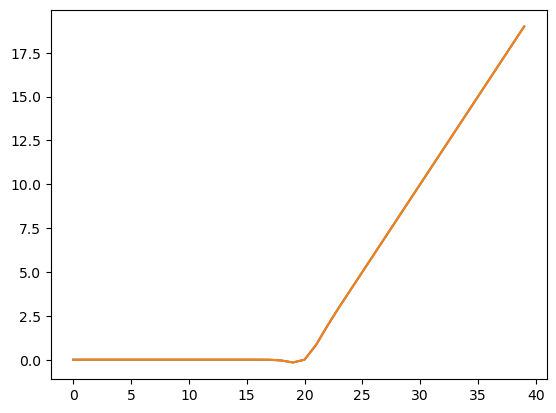

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Exact computation of GELU, through Gaussian Error Function
from scipy.special import erf
def gelu(x) :
        return 0.5 * x * (1 + erf(x / np.sqrt(2)))

# A faster approximation of GELU based on tanh
def gelu_approx(x):
        return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))
    
plt.plot([gelu(x) for x in range(-20, 20)])
plt.plot([gelu_approx(x) for x in range(-20, 20)])
plt.show()

In [1]:
# text PCA
# https://stackoverflow.com/questions/48019843/pca-on-word2vec-embeddings
# https://github.com/tolga-b/debiaswe
from __future__ import print_function, division
import re
import sys
import numpy as np
import scipy.sparse
from sklearn.decomposition import PCA
if sys.version_info[0] < 3:
    import io
    open = io.open
else:
    unicode = str
"""
Tools for debiasing word embeddings
Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings
Tolga Bolukbasi, Kai-Wei Chang, James Zou, Venkatesh Saligrama, and Adam Kalai
2016
"""

DEFAULT_NUM_WORDS = 27000
FILENAMES = {"g_wiki": "glove.6B.300d.small.txt",
             "g_twitter": "glove.twitter.27B.200d.small.txt",
             "g_crawl": "glove.840B.300d.small.txt",
             "w2v": "GoogleNews-word2vec.small.txt",
             "w2v_large": "GoogleNews-word2vec.txt"}


def dedup(seq):
    seen = set()
    return [x for x in seq if not (x in seen or seen.add(x))]


def safe_word(w):
    # ignore words with numbers, etc.
    # [a-zA-Z\.'_\- :;\(\)\]] for emoticons
    return (re.match(r"^[a-z_]*$", w) and len(w) < 20 and not re.match(r"^_*$", w))


def to_utf8(text, errors='strict', encoding='utf8'):
    """Convert a string (unicode or bytestring in `encoding`), to bytestring in utf8."""
    if isinstance(text, unicode):
        return text.encode('utf8')
    # do bytestring -> unicode -> utf8 full circle, to ensure valid utf8
    return unicode(text, encoding, errors=errors).encode('utf8')


class WordEmbedding:
    def __init__(self, fname):
        self.thresh = None
        self.max_words = None
        self.desc = fname
        print("*** Reading data from " + fname)
        if fname.endswith(".bin"):
            import gensim.models
            model =gensim.models.KeyedVectors.load_word2vec_format(fname, binary=True)
            words = sorted([w for w in model.vocab], key=lambda w: model.vocab[w].index)
            vecs = [model[w] for w in words]
        else:
            vecs = []
            words = []

            with open(fname, "r", encoding='utf8') as f:
                for line in f:
                    s = line.split()
                    v = np.array([float(x) for x in s[1:]])
                    if len(vecs) and vecs[-1].shape!=v.shape:
                        print("Got weird line", line)
                        continue
    #                 v /= np.linalg.norm(v)
                    words.append(s[0])
                    vecs.append(v)
        self.vecs = np.array(vecs, dtype='float32')
        print(self.vecs.shape)
        self.words = words
        self.reindex()
        norms = np.linalg.norm(self.vecs, axis=1)
        if max(norms)-min(norms) > 0.0001:
            self.normalize()

    def reindex(self):
        self.index = {w: i for i, w in enumerate(self.words)}
        self.n, self.d = self.vecs.shape
        assert self.n == len(self.words) == len(self.index)
        self._neighbors = None
        print(self.n, "words of dimension", self.d, ":", ", ".join(self.words[:4] + ["..."] + self.words[-4:]))

    def v(self, word):
        return self.vecs[self.index[word]]

    def diff(self, word1, word2):
        v = self.vecs[self.index[word1]] - self.vecs[self.index[word2]]
        return v/np.linalg.norm(v)

    def normalize(self):
        self.desc += ", normalize"
        self.vecs /= np.linalg.norm(self.vecs, axis=1)[:, np.newaxis]
        self.reindex()

    def shrink(self, numwords):
        self.desc += ", shrink " + str(numwords)
        self.filter_words(lambda w: self.index[w]<numwords)

    def filter_words(self, test):
        """
        Keep some words based on test, e.g. lambda x: x.lower()==x
        """
        self.desc += ", filter"
        kept_indices, words = zip(*[[i, w] for i, w in enumerate(self.words) if test(w)])
        self.words = list(words)
        self.vecs = self.vecs[kept_indices, :]
        self.reindex()

    def save(self, filename):
        with open(filename, "w") as f:
            f.write("\n".join([w+" " + " ".join([str(x) for x in v]) for w, v in zip(self.words, self.vecs)]))
        print("Wrote", self.n, "words to", filename)

    def save_w2v(self, filename, binary=True):
        with open(filename, 'wb') as fout:
            fout.write(to_utf8("%s %s\n" % self.vecs.shape))
            # store in sorted order: most frequent words at the top
            for i, word in enumerate(self.words):
                row = self.vecs[i]
                if binary:
                    fout.write(to_utf8(word) + b" " + row.tostring())
                else:
                    fout.write(to_utf8("%s %s\n" % (word, ' '.join("%f" % val for val in row))))

    def remove_directions(self, directions): #directions better be orthogonal
        self.desc += ", removed"
        for direction in directions:
            self.desc += " "
            if type(direction) is np.ndarray:
                v = direction / np.linalg.norm(direction)
                self.desc += "vector "
            else:
                w1, w2 = direction
                v = self.diff(w1, w2)
                self.desc += w1 + "-" + w2
            self.vecs = self.vecs - self.vecs.dot(v)[:, np.newaxis].dot(v[np.newaxis, :])
        self.normalize()

    def compute_neighbors_if_necessary(self, thresh, max_words):
        thresh = float(thresh) # dang python 2.7!
        if self._neighbors is not None and self.thresh == thresh and self.max_words == max_words:
            return
        print("Computing neighbors")
        self.thresh = thresh
        self.max_words = max_words
        vecs = self.vecs[:max_words]
        dots = vecs.dot(vecs.T)
        dots = scipy.sparse.csr_matrix(dots * (dots >= 1-thresh/2))
        from collections import Counter
        rows, cols = dots.nonzero()
        nums = list(Counter(rows).values())
        print("Mean:", np.mean(nums)-1)
        print("Median:", np.median(nums)-1)
        rows, cols, vecs = zip(*[(i, j, vecs[i]-vecs[j]) for i, j, x in zip(rows, cols, dots.data) if i<j])
        self._neighbors = rows, cols, np.array([v/np.linalg.norm(v) for v in vecs])

    def neighbors(self, word, thresh=1):
        dots = self.vecs.dot(self.v(word))
        return [self.words[i] for i, dot in enumerate(dots) if dot >= 1-thresh/2]

    def more_words_like_these(self, words, topn=50, max_freq=100000):
        v = sum(self.v(w) for w in words)
        dots = self.vecs[:max_freq].dot(v)
        thresh = sorted(dots)[-topn]
        words = [w for w, dot in zip(self.words, dots) if dot>=thresh]
        return sorted(words, key=lambda w: self.v(w).dot(v))[-topn:][::-1]

    def best_analogies_dist_thresh(self, v, thresh=1, topn=500, max_words=50000):
        """Metric is cos(a-c, b-d) if |b-d|^2 < thresh, otherwise 0
        """
        vecs, vocab = self.vecs[:max_words], self.words[:max_words]
        self.compute_neighbors_if_necessary(thresh, max_words)
        rows, cols, vecs = self._neighbors
        scores = vecs.dot(v/np.linalg.norm(v))
        pi = np.argsort(-abs(scores))

        ans = []
        usedL = set()
        usedR = set()
        for i in pi:
            if abs(scores[i])<0.001:
                break
            row = rows[i] if scores[i] > 0 else cols[i]
            col = cols[i] if scores[i] > 0 else rows[i]
            if row in usedL or col in usedR:
                continue
            usedL.add(row)
            usedR.add(col)
            ans.append((vocab[row], vocab[col], abs(scores[i])))
            if len(ans)==topn:
                break

        return ans


def viz(analogies):
    print("\n".join(str(i).rjust(4)+a[0].rjust(29) + " | " + a[1].ljust(29) + (str(a[2]))[:4] for i, a in enumerate(analogies)))


def text_plot_words(xs, ys, words, width = 90, height = 40, filename=None):
    PADDING = 10 # num chars on left and right in case words spill over
    res = [[' ' for i in range(width)] for j in range(height)]
    def rescale(nums):
        a = min(nums)
        b = max(nums)
        return [(x-a)/(b-a) for x in nums]
    print("x:", (min(xs), max(xs)), "y:",(min(ys),max(ys)))
    xs = rescale(xs)
    ys = rescale(ys)
    for (x, y, word) in zip(xs, ys, words):
        i = int(x*(width - 1 - PADDING))
        j = int(y*(height-1))
        row = res[j]
        z = list(row[i2] != ' ' for i2 in range(max(i-1, 0), min(width, i + len(word) + 1)))
        if any(z):
            continue
        for k in range(len(word)):
            if i+k>=width:
                break
            row[i+k] = word[k]
    string = "\n".join("".join(r) for r in res)
#     return string
    if filename:
        with open(filename, "w", encoding="utf8") as f:
            f.write(string)
        print("Wrote to", filename)
    else:
        print(string)


def doPCA(pairs, embedding, num_components = 10):
    matrix = []
    for a, b in pairs:
        center = (embedding.v(a) + embedding.v(b))/2
        matrix.append(embedding.v(a) - center)
        matrix.append(embedding.v(b) - center)
    matrix = np.array(matrix)
    pca = PCA(n_components = num_components)
    pca.fit(matrix)
    # bar(range(num_components), pca.explained_variance_ratio_)
    return pca


def drop(u, v):
    return u - v * u.dot(v) / v.dot(v)

In [20]:
import itertools

def base_cases(l):
    if len(l) < 3:
        return (l[0], l[1]), (l[1], l[0])
    return (l[0], l[1]), (l[0], l[2]), (l[1], l[2])

def base_cases1(l, d, lst):
    res = []
    for v in list(itertools.permutations(lst[l:len(lst)-d+1], d)):
        res.append(lst[:l-1] + list(v))
    return res

base_set = set([1, 2, 3, 4])
all_perms = list(itertools.permutations(base_set, 2))
print(len(all_perms))

res = []
n = 0
while n < len(all_perms) / 2:
    el = all_perms[n]
    available = set(base_set)
    available.remove(el[0])
    available.remove(el[1])
    for el2 in all_perms:
        if el2[0] in available and el2[1] in available:
            #print(el, el2)
            res.append((el, el2))
    n += 1

print(base_cases1(3, 2, [1,2,3,4,5,6,7,8,9]))

12
[[1, 2, 4, 5], [1, 2, 4, 6], [1, 2, 4, 7], [1, 2, 4, 8], [1, 2, 5, 4], [1, 2, 5, 6], [1, 2, 5, 7], [1, 2, 5, 8], [1, 2, 6, 4], [1, 2, 6, 5], [1, 2, 6, 7], [1, 2, 6, 8], [1, 2, 7, 4], [1, 2, 7, 5], [1, 2, 7, 6], [1, 2, 7, 8], [1, 2, 8, 4], [1, 2, 8, 5], [1, 2, 8, 6], [1, 2, 8, 7]]


[0.99244289 0.00755711]
[6.30061232 0.54980396]


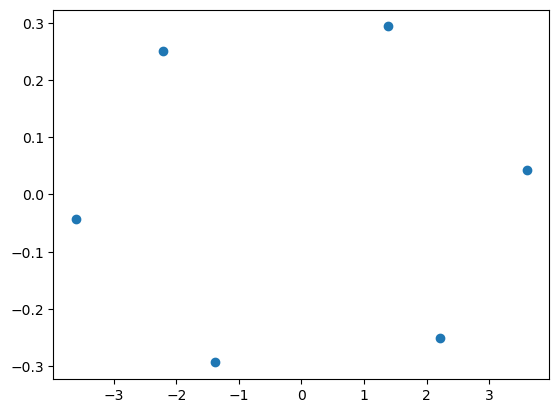

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


In [15]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
x_r = pca.fit(X).transform(X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

plt.scatter(x_r[:, 0], x_r[:, 1])
plt.show()
print(x_r)

explained variance ratio (first two components): [0.92461872 0.05306648]


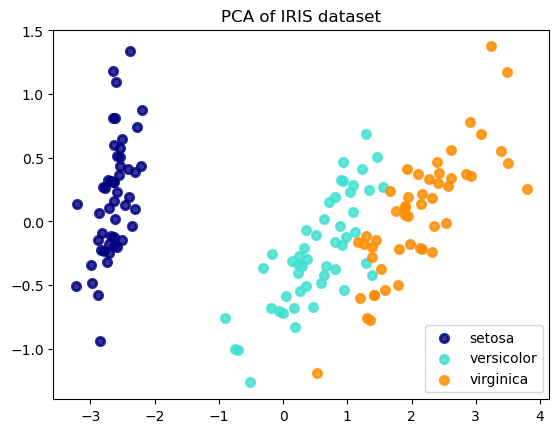

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.show()

In [ ]:
# auction tests



In [28]:
# Rakki maths 2nd test
import random
import math

def sample_div(n=3, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=1):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

def sample_payback(n=4, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    while a < b:
        b = random.randint(10**(m-1), 10**m)
    c = random.randint(2, 10)
    return 'Ein Fahrrad kostet ' + str(a) + ' EUR, Aurelia zahlt ' + str(b) + ' an. Wie viel muss Aurelia in ' + str(c) + ' Raten zahlen?'

def write_number(n=4):
    a = random.randint(10**(n-1), 10**n)
    lttrs = ['T', 'H', 'Z', 'E']
    res = [c + lttrs[i + (len(lttrs)-n)] for i,c in enumerate(str(a))]
    random.shuffle(res)
    return res

def conv_nr(n=2):
    a = random.randint(10**(n-1), 10**n)
    return 'Wie viele mm sind ' + str(a) + ' m?'

def round_number(n=4):
    a = random.randint(10**(n-1), 10**n)
    return ('Runde ' + str(a) + ' auf Zehner, Hunderter und Tausender' + str(), int(round(a/1000, 2)*1000), int(round(a/1000, 1)*1000), int(round(a/1000, 0)*1000))


for i in range(2):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(3):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")
for i in range(2): 
    print(f"{sample_payback()}")
for i in range(2):
    print(f"{write_number()}")
for i in range(2):
    print(f"{conv_nr()}")
for i in range(6):  
    print(round_number())

570 : 38 = 15, R 0
871 : 41 = 21, R 10
440 * 8 = 3520
780 * 1 = 780
423 * 1 = 423
Ein Fahrrad kostet 2907 EUR, Aurelia zahlt 483 an. Wie viel muss Aurelia in 9 Raten zahlen?
Ein Fahrrad kostet 8188 EUR, Aurelia zahlt 371 an. Wie viel muss Aurelia in 10 Raten zahlen?
['7E', '0H', '8Z', '8T']
['8E', '5H', '3Z', '1T']
Wie viele mm sind 39 m?
Wie viele mm sind 39 m?
('Runde 2962 auf Zehner, Hunderter und Tausender', 2960, 3000, 3000)
('Runde 3834 auf Zehner, Hunderter und Tausender', 3830, 3800, 4000)
('Runde 5366 auf Zehner, Hunderter und Tausender', 5370, 5400, 5000)
('Runde 6009 auf Zehner, Hunderter und Tausender', 6010, 6000, 6000)
('Runde 7241 auf Zehner, Hunderter und Tausender', 7240, 7200, 7000)
('Runde 1149 auf Zehner, Hunderter und Tausender', 1150, 1100, 1000)


In [29]:
.15*.8

0.12